# MArketing Lab (Generalized Linear Models-Binary Data)

**Learning Objectives:**
  * Define and fit generalized linear models for binary data
  * Gain exposure to marketing related DataSets

## Context of the Analysis

### Context- A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only  499 US Dollars ($999 on other days). It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.
### Objective - The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.


### About this file
This data was gathered during last year's campaign.
#### Data description is as follows;

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* ID - Unique ID of each customer
* Year_Birth - Age of the customer
* Complain - 1 if the customer complained in the last 2 years
* Dt_Customer - date of customer's enrollment with the company
* Education - customer's level of education
* Marital - customer's marital status
* Kidhome - number of small children in customer's household
* Teenhome - number of teenagers in customer's household
* Income - customer's yearly household income
* MntFishProducts - the amount spent on fish products in the last 2 years
* MntMeatProducts - the amount spent on meat products in the last 2 years
* MntFruits - the amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - the amount spent on wine products in the last 2 years
* MntGoldProds - the amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through the company's website
* NumWebVisitsMonth - number of visits to company's website in the last month
* Recency - number of days since the last purchase

## 1. Library Import

In [134]:
!pip install linearmodels
!pip install wooldridge

In [135]:
import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import linearmodels as plm
import numpy as np
from scipy import stats
import warnings

In [136]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [137]:
Data=pd.read_csv("https://raw.githubusercontent.com/thousandoaks/Maths4DS-III/refs/heads/main/datasets/superstore_data.csv")


In [138]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [139]:
Data.sample(3).T

,1142,1172,846
Id,8080,4769,8527
Year_Birth,1986,1977,1965
Education,Graduation,Master,Master
Marital_Status,Single,Together,Together
Income,26816.0,57954.0,65735.0
Kidhome,0,1,1
Teenhome,0,1,1
Dt_Customer,8/17/2012,6/18/2014,7/12/2013
Recency,50,52,37
MntWines,5,456,239


## 3. Data Transformation

In [140]:
## We set date related columns as datetimes




In [141]:
# prompt: convert Year_Birth and Dt_Customer to datetimes

# Convert 'Year_Birth' to datetime, assuming it represents the year of birth
Data['Year_Birth'] = pd.to_datetime(Data['Year_Birth'], format='%Y', errors='coerce')

# Convert 'Dt_Customer' to datetime, assuming it's in a standard date format (you might need to adjust the format)
Data['Dt_Customer'] = pd.to_datetime(Data['Dt_Customer'], errors='coerce')


In [142]:
Data.sample(3).T

,1201,546,1873
Id,3276,968,2416
Year_Birth,1976-01-01 00:00:00,1968-01-01 00:00:00,1969-01-01 00:00:00
Education,2n Cycle,Master,PhD
Marital_Status,Together,Divorced,Single
Income,36301.0,41335.0,66582.0
Kidhome,1,1,0
Teenhome,0,0,0
Dt_Customer,2013-10-25 00:00:00,2013-12-26 00:00:00,2014-03-03 00:00:00
Recency,53,24,83
MntWines,11,112,789


In [144]:
## We remove customers being born before 1940 as they are probably ouliers

AgeFilter=Data['Year_Birth']>='1940-01-01'

In [145]:
Data[~AgeFilter]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893-01-01,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899-01-01,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900-01-01,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,7,4,25,1,2,1,2,5,0,1


In [147]:
# We order the column Dt_Customer_New to determine who is the most recent customer, that defines the most recent date
Data['Dt_Customer'].sort_values()

,Dt_Customer
1509,2012-01-08
2222,2012-01-08
455,2012-01-08
1398,2012-01-08
2239,2012-01-09
...,...
667,2014-12-05
52,2014-12-05
434,2014-12-05
1569,2014-12-05


In [148]:
# We compute the number of days customers have been with the company based on the most recent date 2015-01-01
Data['TimeWithUs']=Data['Dt_Customer'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['MonthsWithUs']=Data['TimeWithUs']/np.timedelta64(30, "D")

In [149]:
## We compute the age of the customer based on the most recent date 2015-01-01

Data['Age']=Data['Year_Birth'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['AgeYears']=Data['Age']/np.timedelta64(365, "D")

In [150]:
SuperStore=Data[AgeFilter]
SuperStore.sample(3).T

,269,2207,1526
Id,967,9757,7462
Year_Birth,1976-01-01 00:00:00,1972-01-01 00:00:00,1954-01-01 00:00:00
Education,Graduation,Graduation,Graduation
Marital_Status,Married,Together,Single
Income,46049.0,84906.0,22507.0
Kidhome,1,0,0
Teenhome,1,0,0
Dt_Customer,2013-07-21 00:00:00,2013-04-10 00:00:00,2012-11-24 00:00:00
Recency,11,98,67
MntWines,342,997,68


## 4. Exploratory Data Analysis

In [151]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

### Impact of quantitative factors on the response.

In [188]:
quantitativefactorsToExplore=['Recency', 'Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','MonthsWithUs','AgeYears']

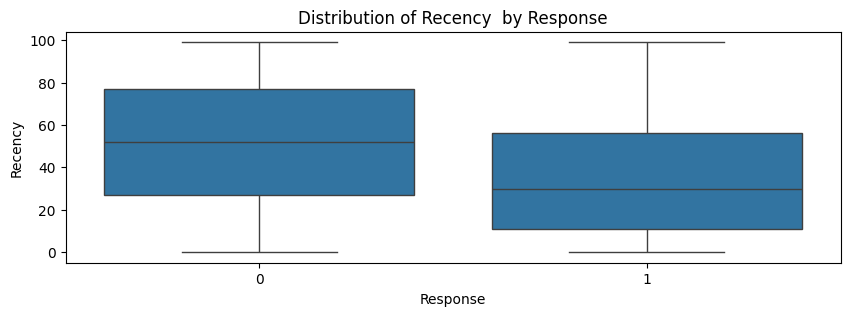

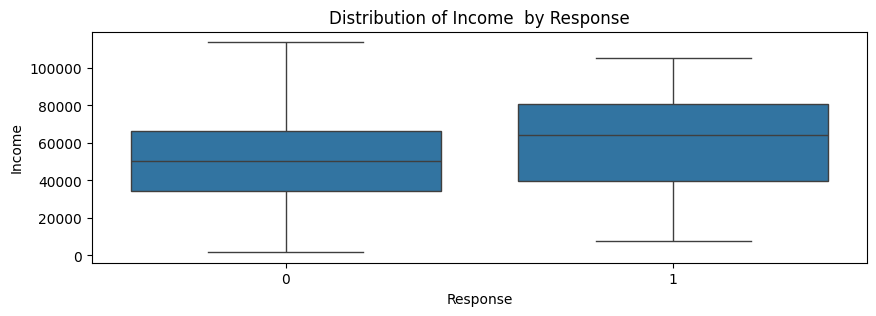

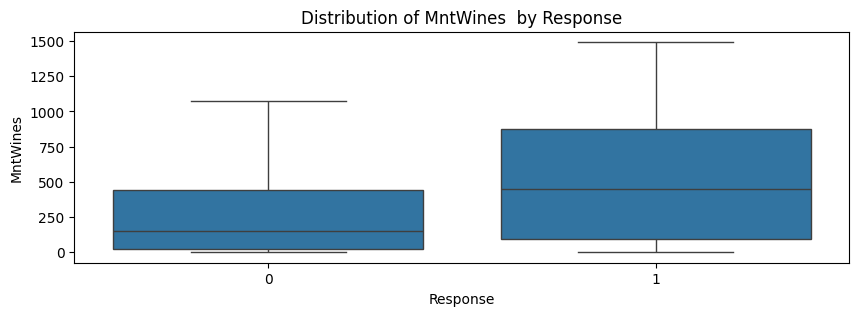

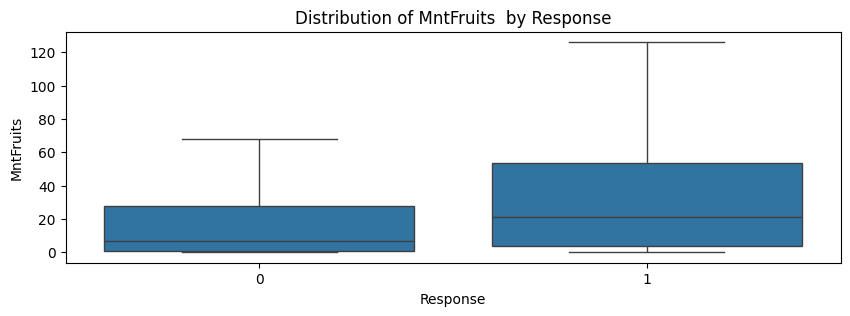

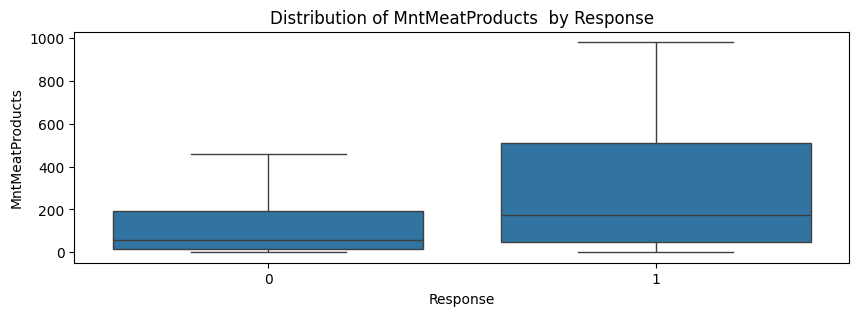

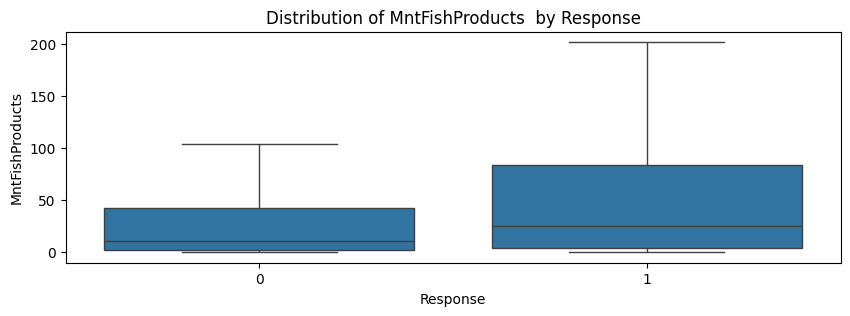

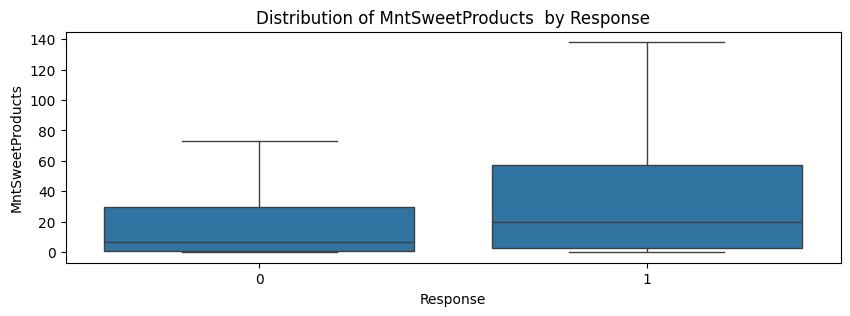

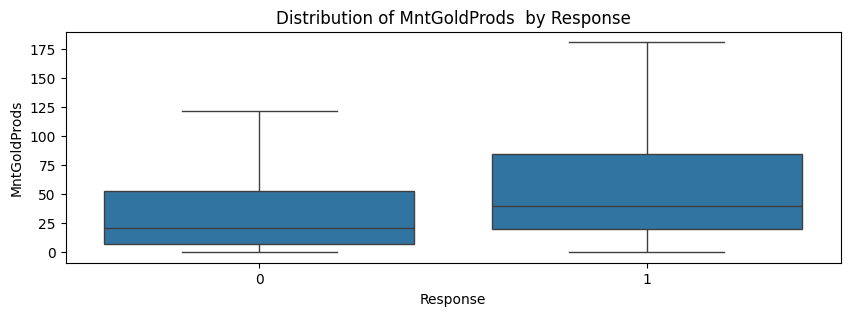

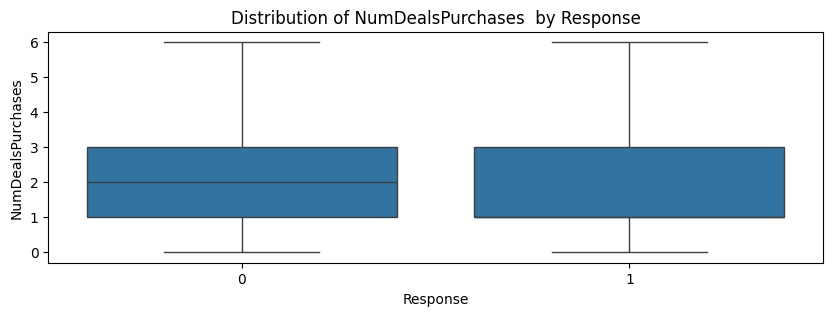

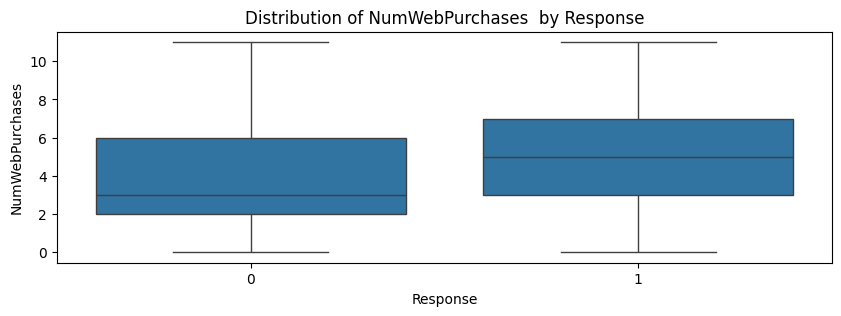

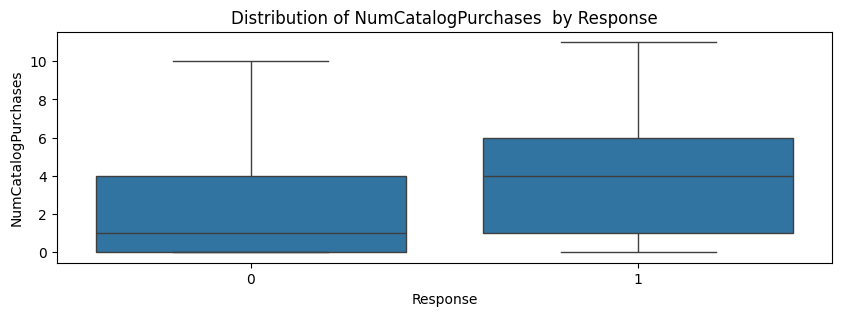

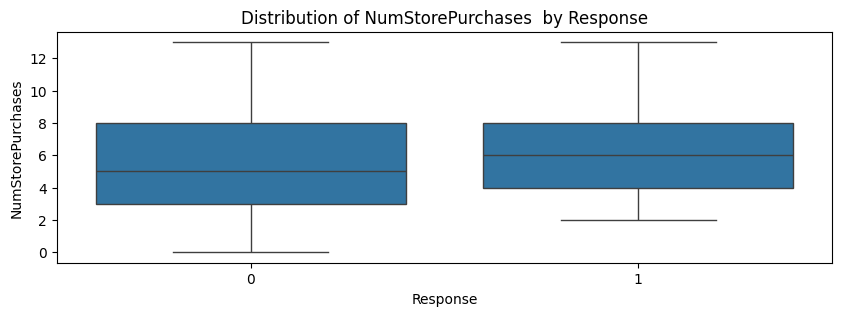

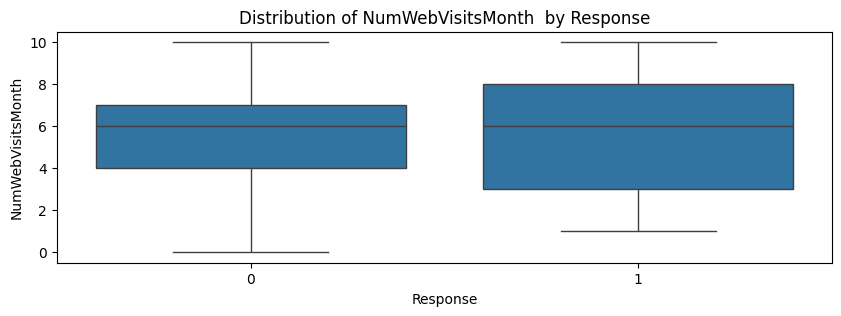

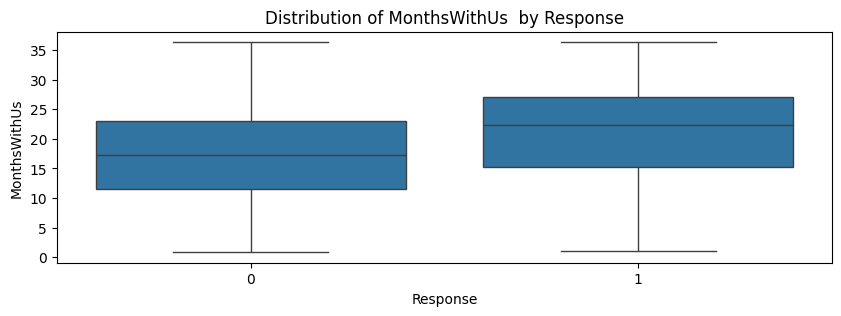

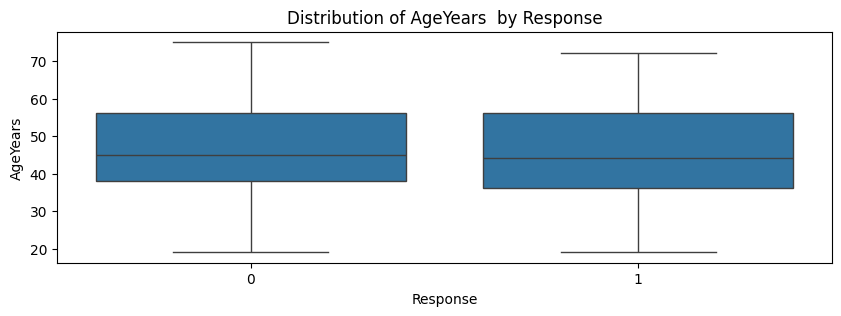

In [190]:
for factor in quantitativefactorsToExplore:
  plt.figure(figsize=(10, 3))
  sns.boxplot(x='Response', y=factor, data=SuperStore, showfliers=False)
  #plt.yscale('log')
  plt.title(f'Distribution of {factor}  by Response')
  plt.show()

### Impact of qualitative factors on the response.

In [154]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

In [167]:
qualitativeFactorstoExplore=['Education', 'Marital_Status', 'Kidhome',
       'Teenhome','Complain']

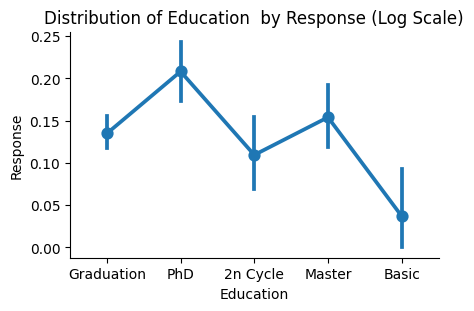

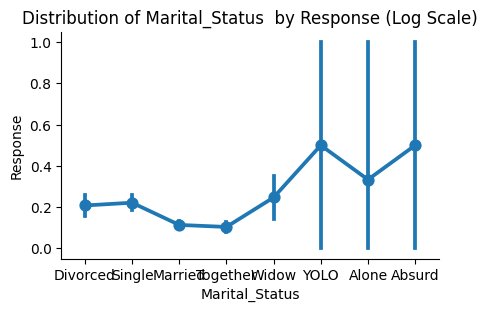

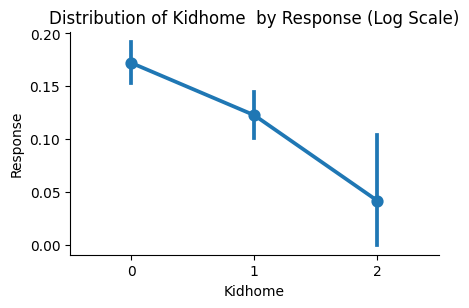

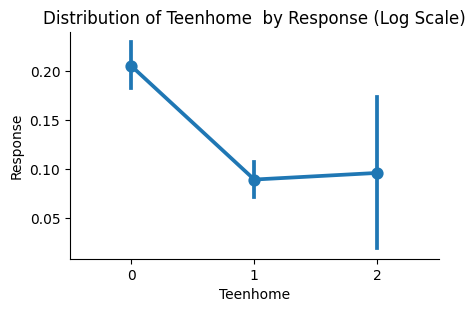

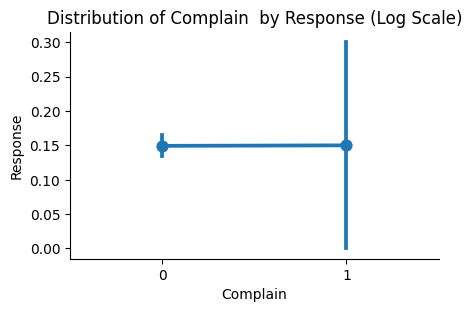

In [170]:
for factor in qualitativeFactorstoExplore:

  sns.catplot(data=SuperStore, x=factor, y="Response", kind="point",height=3, aspect=1.5)
  #plt.yscale('log')
  plt.title(f'Distribution of {factor}  by Response (Log Scale)')
  plt.show()



From the previous Analyses we conclude that some factors, both qualitative and quantitative, seem to have an impact of the reponse (propensity of the customer to accept the offer)

## 5. What drives customers' propensity to accept the offer ?
### We want to explore the impact of each factor on the response.
#### Given that the response is binary (Accept/Reject) we fit a GLM Binomial model.


#### We will assume that the random variable approve follows a binomial distribution
$Y_i\sim Binomial(n,p)$


#### We assume a logit function, this means that we are assuming that the log odds of the outcome can be modeled as a linear combination of the factors under consideration.

$ logit(P(approve=1))=log(\frac{P(approve=1)}{P(approve=0)})=\beta_0+\beta_1*white+\ldots+\beta_p*X_p $

### 5.1. Estimation of the parameters


In [171]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

In [173]:
SuperStore.sample(3)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TimeWithUs,MonthsWithUs,Age,AgeYears
939,8135,1986-01-01,Master,Married,27161.0,1,0,2013-10-28,41,7,...,1,0,3,7,0,0,430 days,14.333333,10592 days,29.019178
780,4472,1970-01-01,PhD,Divorced,35682.0,1,0,2014-06-27,34,23,...,1,1,3,2,0,0,188 days,6.266667,16436 days,45.030137
364,1876,1990-01-01,Graduation,Married,18929.0,0,0,2013-02-16,15,32,...,1,0,4,6,0,0,684 days,22.800000,9131 days,25.016438


In [178]:
formulaExpression='Response ~ Education+Marital_Status+Income+Kidhome+Teenhome+Recency+MntWines+MntFruits+MntMeatProducts+MntFishProducts+MntSweetProducts+MntGoldProds+NumDealsPurchases+NumWebPurchases+NumCatalogPurchases+NumStorePurchases+NumWebVisitsMonth+Complain+MonthsWithUs+AgeYears'

In [186]:
reg = smf.glm(formula=formulaExpression,family=sm.families.Binomial(),data=SuperStore)



# We fit the model
results = reg.fit()

In [187]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Response   No. Observations:                 2213
Model:                            GLM   Df Residuals:                     2183
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -672.05
Date:                Thu, 03 Oct 2024   Deviance:                       1344.1
Time:                        09:13:52   Pearson chi2:                 1.84e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2131
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.4379      1.621     -0.887      0.375      -4.615       1.739
Education[T.Basic]            -1.2726      0.794     -1.603      0.109      -2.829       0.283
Education[T.Graduation]        0.2041      0.281      0.727      0.467      -0.346       0.754
Education[T.Master]            0.3664      0.319      1.148      0.251      -0.259       0.992
Education[T.PhD]               0.8584      0.305      2.812      0.005       0.260       1.457
Marital_Status[T.Alone]       -0.2195      2.002     -0.110      0.913      -4.144       3.705
Marital_Status[T.Divorced]    -1.3859      1.550     -0.894      0.371      -4.423       1.651
Marital_Status[T.Married]     -2.4497      1.544     -1.587      0.112      -5.475       0.576
Marital_Status[T.Single]      -1.3848      1.544     -0.897      0.370      -4.411       1.641
Marital_Status[T.Together]    -2.4588      1.546     -1.590      0.112      -5.490       0.572
Marital_Status[T.Widow]       -1.2903      1.573     -0.820      0.412      -4.373       1.792
Marital_Status[T.YOLO]        -1.5379      2.110     -0.729      0.466      -5.673       2.597
Income                      1.843e-06   2.98e-06      0.618      0.536      -4e-06    7.69e-06
Kidhome                        0.3637      0.195      1.864      0.062      -0.019       0.746
Teenhome                      -1.0998      0.184     -5.981      0.000      -1.460      -0.739
Recency                       -0.0281      0.003    -10.449      0.000      -0.033      -0.023
MntWines                       0.0017      0.000      5.767      0.000       0.001       0.002
MntFruits                      0.0008      0.002      0.361      0.718      -0.003       0.005
MntMeatProducts                0.0018      0.000      3.911      0.000       0.001       0.003
MntFishProducts               -0.0027      0.002     -1.593      0.111      -0.006       0.001
MntSweetProducts               0.0019      0.002      0.930      0.352      -0.002       0.006
MntGoldProds                   0.0041      0.001      2.822      0.005       0.001       0.007
NumDealsPurchases              0.0206      0.044      0.469      0.639      -0.065       0.106
NumWebPurchases                0.0762      0.030      2.514      0.012       0.017       0.136
NumCatalogPurchases            0.1026      0.036      2.819      0.005       0.031       0.174
NumStorePurchases             -0.1976      0.031     -6.353      0.000      -0.259      -0.137
NumWebVisitsMonth              0.1290      0.043      2.984      0.003       0.044       0.214
Complain                       0.1027      0.820      0.125      0.900      -1.504       1.710
MonthsWithUs                   0.0669      0.010      6.490      0.000       0.047       0.087
AgeYears                       0.0009      

We observe in the previous table that not all factors are statistically significant (p-values larger than 0.005). We remove those and fit a new simplified model.

In [201]:
formulaExpressionSimplified='Response ~ Education+Kidhome+Teenhome+Recency+MntWines+MntMeatProducts+MntGoldProds+NumWebPurchases+NumCatalogPurchases+NumStorePurchases+NumWebVisitsMonth+MonthsWithUs'

In [202]:
reg2 = smf.glm(formula=formulaExpressionSimplified,family=sm.families.Binomial(),data=SuperStore)



# We fit the model
results2 = reg2.fit()

In [203]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Response   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2221
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -711.25
Date:                Thu, 03 Oct 2024   Deviance:                       1422.5
Time:                        09:32:36   Pearson chi2:                 1.92e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1871
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.3442      0.425     -7.865      0.000      -4.178      -2.511
Education[T.Basic]         -1.2134      0.783     -1.550      0.121      -2.747       0.321
Education[T.Graduation]     0.2577      0.268      0.961      0.336      -0.268       0.783
Education[T.Master]         0.4795      0.302      1.588      0.112      -0.112       1.072
Education[T.PhD]            0.8993      0.289      3.115      0.002       0.333       1.465
Kidhome                     0.2348      0.176      1.337      0.181      -0.109       0.579
Teenhome                   -1.0056      0.154     -6.537      0.000      -1.307      -0.704
Recency                    -0.0263      0.003    -10.149      0.000      -0.031      -0.021
MntWines                    0.0016      0.000      5.707      0.000       0.001       0.002
MntMeatProducts             0.0017      0.000      4.170      0.000       0.001       0.002
MntGoldProds                0.0035      0.001      2.568      0.010       0.001       0.006
NumWebPurchases             0.0660      0.027      2.403      0.016       0.012       0.120
NumCatalogPurchases         0.1051      0.034      3.067      0.002       0.038       0.172
NumStorePurchases          -0.1744      0.029     -5.995      0.000      -0.231      -0.117
NumWebVisitsMonth           0.1449      0.037      3.874      0.000       0.072       0.218
MonthsWithUs                0.0599      0.010      6.052      0.000       0.041       0.079
===========================================================================================
"""

## 6. Model interpretation:


#### Offer made to Customers with a PhD increase the log odds of acceptance by 0.8993 (versus the reference category: 2nd Cycle).

#### The factor Kidshome is not statistically significant

#### Increasing number of teens at home decrease the log odds of acceptance.

#### Increasing recency decrease the log odds of acceptance. This means that the longer the customer has not purchased from the company the lower the odds of accepting th offer (customer churning).

#### Customers purchasing frequently in Stores are less inclined to accept the offer (-0.1744).



#### The rest of factors are statisically significant and with possitive coefficients, therefore have a positive impact on the log odds of accepting the offer.





## From a practical standpoint
### we would be offering the discount to customers with higher level of education, no kids, no teenagers, who purchased recently, who buy wine, meat and gold products. Who do not buy in store, visit the web often and have been with the company for a while already.